# ESgamess: molecule and Gamess job handling class (basic demo)
30/03/21

This class handles Gamess jobs (full pipeline) on a local machine only.

Core functionality is provided by the following libraries:

- [PubChemPy](https://pypi.org/project/PubChemPy/)
   - Interface with [PubChem](https://pubchem.ncbi.nlm.nih.gov).
- [RDKit](https://rdkit.org/docs/index.html)
   - Molecule class/handling routines.
   - Transformations.
   - Figures (2D natively, uses [py3Dmol on the backend](https://pypi.org/project/py3Dmol/) for 3D rendering).
- [pygamess](https://github.com/kzfm/pygamess)
   - Setup Gamess input cards.
   - Run Gamess calculations (local machine only).

This class creates a pipeline with these tools, and implements a few extra helper routines, with the general aim to make this part of the process as painless as possible.

Minimal method for pipeline to ePolyScat jobs:

PubChem download > Fix reference frame (symmetry axis to Z) > Run Gamess > Export/convert.

This is [implemented directly](#Minimal-job-pipeline-to-generate-electronic-structure-&-input-files-for-ePolyScat).

22/11/23, 23/01/24 (debug & tidy)

Updated some methods and finished notes.

- Better setCoords() handling, including Pandas method.
- Support for XYZ files for molecule creation (RDkit version > 2022.03 required).

## Imports

In [1]:
# Import class
from epsman.elecStructure.gamess import ESgamess

## Molecule creation routines

Currently wraps routines from RDkit + PubChemPy for rapid setup from existing sources. Shows 2D structure and coord tabe on execution.

Notes:

- Atom sequence and labelling may change with method.
- Similarly, atomic charges, bonding and display may change with method.
- In general, this doesn't matter if coords are passed to another electronic structure routine, but may be important in some cases.

TODO: add support for manual molecule creation. This can be done via a file at the moment, or via RDkit backend (see, for example, [the RDkit docs](https://www.rdkit.org/docs/GettingStartedInPython.html#reading-and-writing-molecules)).

### Easy methods

Set name = N2O
Set smiles = None
Set molFile = None
Set xyz = None
Set molOverride = None
*** File /mnt/femtobackSSHFS/DriveSyncShare/code-share/github-share/epsman/demos/N2O.SDF already exists; existing file will be used. Pass overwrite=True to overwrite.
Set job = None
Set sym = C1
Set atomList = None
Set precision = 6
Set atomsDict = {}
Set refDict = {}
Set atomsHist = {}
*** Updating coords (Pandas version).


[18:04:30] Warning: molecule is tagged as 3D, but all Z coords are zero


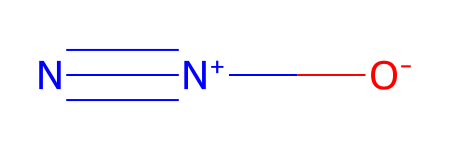

,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,1.3063,0.0,0.0
1,1,N,7,-0.1096,0.0,0.0
2,2,N,7,-1.1967,0.0,0.0


In [2]:
# Molecule from PubChem
testDL = ESgamess(searchName = 'N2O')

Set name = None
Set smiles = [N-]=[N+]=O
Set molFile = None
Set xyz = None
Set molOverride = None
Set job = None
Set sym = C1
Set atomList = None
Set precision = 6
Set atomsDict = {}
Set refDict = {}
Set atomsHist = {}
*** Updating coords (Pandas version).


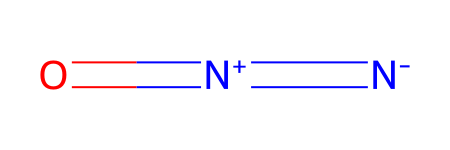

,Ind,Species,Atomic Num.,x,y,z
0,0,N,7,1.222602,0.0,0.0
1,1,N,7,-0.007294,0.0,0.0
2,2,O,8,-1.215308,0.0,0.0


In [3]:
# Molecule from SMILES
testSmiles = ESgamess(smiles = '[N-]=[N+]=O')

Set name = None
Set smiles = None
Set molFile = N2O.SDF
Set xyz = None
Set molOverride = None
Set job = None
Set sym = C1
Set atomList = None
Set precision = 6
Set atomsDict = {}
Set refDict = {}
Set atomsHist = {}
*** Updating coords (Pandas version).


[18:04:31] Warning: molecule is tagged as 3D, but all Z coords are zero


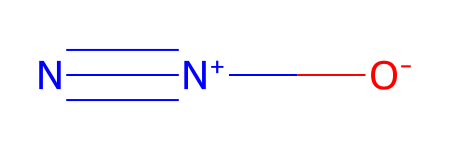

,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,1.3063,0.0,0.0
1,1,N,7,-0.1096,0.0,0.0
2,2,N,7,-1.1967,0.0,0.0


In [4]:
# From file, e.g. SDF file downloaded from PubChem above.
# This uses RDkit Chem.MolFromMolFile() on the backend, 
# For details of files supported see https://www.rdkit.org/docs/RDKit_Book.html#mol-sdf-support-and-extensions 
# and https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html

testFile = ESgamess(molFile = 'N2O.SDF')

### Manual or from XYZ file

Since RDKit 2022.03 XYZ file support is included, which is also suitable for manual molecule creation from a list of atoms and coordinates.

Full details can be found in https://github.com/rdkit/UGM_2022/blob/main/Notebooks/Landrum_WhatsNew.ipynb

The method can be used to init a system from a file or string representation. The basic format is:

```
[no. atoms]

[Atom 0] [x] [y] [z]
[Atom 1] [x] [y] [z]
...

```

In [5]:
# Generate XYZ representation from existing case above
testDL.genXYZ()

Generated XYZ string repr:

3

O  1.3063 0.0 0.0
N -0.1096 0.0 0.0
N -1.1967 0.0 0.0

Data set to self.xyzStr


Set name = None
Set smiles = None
Set molFile = None
Set xyz from passed values.
Set molOverride = None
Set job = None
Set sym = C1
Set atomList = None
Set precision = 6
Set atomsDict = {}
Set refDict = {}
Set atomsHist = {}
*** Updating coords (Pandas version).


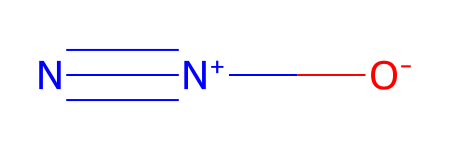

,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,1.3063,0.0,0.0
1,1,N,7,-0.1096,0.0,0.0
2,2,N,7,-1.1967,0.0,0.0


In [6]:
# Use the string representation to define a new system

testXYZstr = ESgamess(xyz = testDL.xyzStr)

Set name = None
Set smiles = None
Set molFile = None
Set xyz from passed values.
Set molOverride = None
Set job = None
Set sym = C1
Set atomList = None
Set precision = 6
Set atomsDict = {}
Set refDict = {}
Set atomsHist = {}
*** Updating coords (Pandas version).


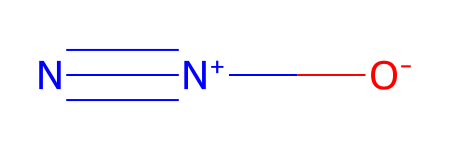

,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,1.3063,0.0,0.0
1,1,N,7,-0.1096,0.0,0.0
2,2,N,7,-1.1967,0.0,0.0


In [7]:
# Note that this routine can accept a string, or filename.

testXYZfile = ESgamess(xyz = 'N2O.xyz')

### Additional info

If `Pandas` is available, a fancy print is available with `printTable()`.

In [8]:
testDL.printTable()

,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,1.3063,0.0,0.0
1,1,N,7,-0.1096,0.0,0.0
2,2,N,7,-1.1967,0.0,0.0


If `py3Dmol` is available, interactive 3D plots are available in notebooks with `plot3D()`.

In [9]:
testDL.plot3D()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

The molecule is stored as an RDkit object, `self.mol`, and [RDkit methods are also available](https://www.rdkit.org/docs/GettingStartedInPython.html).

In [10]:
type(testDL.mol)

rdkit.Chem.rdchem.Mol

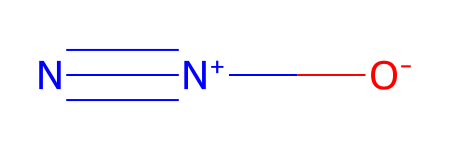

In [11]:
# Calling the object will render it
testDL.mol

In [12]:
# RDkit method example
testDL.mol.GetNumAtoms()

3

## pyGamess wrapper

### Setup Gamess job

In [13]:
# Init the pyGamess job.
# This minimally needs a gamess_path set, which defaults to '/opt/gamess'
testDL.initGamess() # Using defaults

*** Init pyGamess job.
Default Gamess input card set (use self.params to modify options dictionary, self.setGamess() to test):

 $contrl scftyp=rhf runtyp=energy $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $DATA
None
C1
O      8.0      1.3063000000    0.0000000000    0.0000000000 
N      7.0     -0.1096000000    0.0000000000    0.0000000000 
N      7.0     -1.1967000000    0.0000000000    0.0000000000 
 $END

*** Found Gamess executable: /opt/gamess/gamess.00.x


This creates a `pyGamess` object, accessible at `self.g`, and properties can be inspected.

In [14]:
print(type(testDL.g))
print(testDL.g.gamess_path)

<class 'epsman.elecStructure.gamess.gamessInput'>
/opt/gamess


All Gamess job parameters are stored in a dictionary, at `self.params` (also `self.g.options`), and can be set there directly using `self.setParam()` or dictionary methods. (For more details, see the [pyGamess docs for more info](https://github.com/kzfm/pygamess), and the [Gamess manual Input section for details of the available options](https://www.msg.chem.iastate.edu/gamess/GAMESS_Manual/input.pdf).)

`pyGamess` doesn't support symmetry or job annotation (uses 'C1' only), this can be added via a class wrapper here, and can be set via `self.setGamess` (this is also run automatically at class init). This adds an `extras` item to the params dictionary, with additional job details including symmetry.

**Note that is symmetry is set to anything other than 'C1', coordinate transforms may be required.** [See notes below.](#Symmetry-&-frame-transformations)

In [15]:
# Show all params
testDL.params

{'contrl': {'scftyp': 'rhf', 'runtyp': 'energy'},
 'basis': {'gbasis': 'sto', 'ngauss': '3'},
 'statpt': {'opttol': '0.0001', 'nstep': '20'},
 'system': {'mwords': '30'},
 'cis': {'nstate': '1'},
 'extra': {'job': None, 'sym': 'C1', 'atomList': None}}

In [16]:
# Params can be modified or added using the setParams method...
testDL.setParam(inputGroup='contrl',inputDict={'maxit':30})

Updating existing group 'contrl'. (To replace group, pass 'resetGroup=True')
Updated group 'contrl': {'scftyp': 'rhf', 'runtyp': 'energy', 'maxit': 30}


In [17]:
# Pass resetGroup = True to replace all existing group settings with the passed dict (otherwise settings will be added)...
testDL.setParam(inputGroup='contrl',inputDict={'scftyp': 'rhf'}, resetGroup = True)

Replacing existing group 'contrl'.
Updated group 'contrl': {'scftyp': 'rhf'}


In [18]:
# Params can also be modified or added using dictionary syntax
testDL.params['contrl']['runtyp']='energy'
testDL.params['contrl']['maxit'] = 60  # Add a control param. See https://www.msg.chem.iastate.edu/gamess/GAMESS_Manual/input.pdf
testDL.params

{'contrl': {'scftyp': 'rhf', 'runtyp': 'energy', 'maxit': 60},
 'basis': {'gbasis': 'sto', 'ngauss': '3'},
 'statpt': {'opttol': '0.0001', 'nstep': '20'},
 'system': {'mwords': '30'},
 'cis': {'nstate': '1'},
 'extra': {'job': None, 'sym': 'C1', 'atomList': None}}

The current Gamess input card can always be checked via `self.printGamessInput()`

In [19]:
testDL.printGamessInput()


*** Gamess input card:
 $contrl scftyp=rhf runtyp=energy maxit=60 $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $DATA
None
C1
O      8.0      1.3063000000    0.0000000000    0.0000000000 
N      7.0     -0.1096000000    0.0000000000    0.0000000000 
N      7.0     -1.1967000000    0.0000000000    0.0000000000 
 $END



### Run Gamess

#### Basic energy run

If a valid `gamess_path` is set, then this is simple, and the basic results are returned to `self.mol`, along with some diagnostic information.

In [20]:
# Run as per input card
testDL.runGamess()

INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x dnzsdh -ddi 1 1 jake -scr /tmp/tmp0dfrb9y6 > /tmp/tmp0dfrb9y6/dnzsdh.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -181.1830797993


In [21]:
# Energy
testDL.E

'-181.1830797993'

#### Run geometry optimization

Note this may fail in some cases for geometries not aligned in the preferred Gamess manner (major symmetry axis == z-axis), but in this case diagnostic info should be printed to screen.

In [22]:
# Run optimization, in this case the updated coord table is also shown if self.verbose > 1
# testDL.verbose = 2
testDL.runGamess(runType = 'optimize')

INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x wsjvxw -ddi 1 1 jake -scr /tmp/tmp0dfrb9y6 > /tmp/tmp0dfrb9y6/wsjvxw.out


*** Warning: found errors in Gamess output, type: Warnings
*** Check self.mol.GetProp('Warnings') for details.
*** Warning: found errors in Gamess output, type: ddikick
*** Check self.mol.GetProp('ddikick') for details.
*** Gamess run completed with warnings.
E = -181.1830797993

*** Gamess optimization run - reseting self.mol with updated coords.
Note that atom ordering may change depending on Gamess output.
Found 1 geometry iterations in Gamess output.
Updating with new coords, output set to self.mol


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,1.3063,0.0,0.0
1,1,N,7,-0.1096,0.0,0.0
2,2,N,7,-1.1967,0.0,0.0


*** WARNINGS FOUND IN GAMESS OUTPUT, values for E and molecular coords may reflect input molecule if run did not complete.
Set geom opt coord outputs to self.geomOpt.


#### Troubleshooting Gamess errors

In case of issues, the current outputs can be inspected (or maybe printed directly if `self.verbose > 1`).

In [23]:
# Check errors if present
print(testDL.mol.GetProp('Warnings'))
print(testDL.mol.GetProp('ddikick'))

 ddikick.x: application process 0 quit unexpectedly.
 ddikick.x: Sending kill signal to DDI processes.
 ddikick.x: Execution terminated due to error(s).


For geometry optimizations, the issue is typically the orientation of the coordinate system. A quick fix is to run the rotateFrame() method, which will try and orient the canonical RDkit alignment (symmetry axis == x-axis) to the canonical Gamess alignment (symmetry axis == z-axis), see [below for more details](#Symmetry-&-frame-transformations). Note that basic energy runs usually work without this fix, but it is required for geometry optimization or use of symmetry.

In [24]:
# A quick fix is to run the rotateFrame() method
testDL.rotateFrame()
testDL.verbose = 2   # If self.verbose > 1, runGamess will also print new (optimized) geom
testDL.runGamess(runType = 'optimize')

*** Updating coords (Pandas version).
*** Set frame rotations, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,-1.3063
1,1,N,7,0.0,0.0,0.1096
2,2,N,7,0.0,0.0,1.1967


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x qmzrap -ddi 1 1 jake -scr /tmp/tmp0dfrb9y6 > /tmp/tmp0dfrb9y6/qmzrap.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -181.2047216883


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,-1.235127
1,1,N,7,0.0,0.0,0.040309
2,2,N,7,0.0,0.0,1.194818



*** Gamess optimization run - reseting self.mol with updated coords.
Note that atom ordering may change depending on Gamess output.
Found 9 geometry iterations in Gamess output.
Updated coords from Gamess run:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,-1.235127
1,1,N,7,0.0,0.0,0.040309
2,2,N,7,0.0,0.0,1.194818


Updating with new coords, output set to self.mol


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,-1.235127
1,1,N,7,0.0,0.0,0.040309
2,2,N,7,0.0,0.0,1.194818


Updated coords from Gamess run:


Ind Species  Atomic Num.    x    y         z
Geom iter Atom index                                              
0         0             0       O            8  0.0  0.0 -1.306300
          1             1       N            7  0.0  0.0  0.109600
          2             2       N            7  0.0  0.0  1.196700
1         0             3       O            8  0.0  0.0 -1.314860
          1             4       N            7  0.0  0.0  0.023539
          2             5       N            7  0.0  0.0  1.291321
2         0             6       O            8  0.0  0.0 -1.282565
          1             7       N            7  0.0  0.0  0.043055
          2             8       N            7  0.0  0.0  1.239510
3         0             9       O            8  0.0  0.0 -1.228473
          1            10       N            7  0.0  0.0  0.047486
          2            11       N            7  0.0  0.0  1.180987
4         0            12       O            8  0.0  0.0 -1.232768
          1            13       N            7  0.0  0.0  0.037089
          2            14       N            7  0.0  0.0  1.195679
5         0            15       O            8  0.0  0.0 -1.237216
          1            16       N            7  0.0  0.0  0.041190
          2            17       N            7  0.0  0.0  1.196026
6         0            18       O            8  0.0  0.0 -1.234882
          1            19       N            7  0.0  0.0  0.040325
          2            20       N            7  0.0  0.0  1.194557
7         0            21       O            8  0.0  0.0 -1.235127
          1            22       N            7  0.0  0.0  0.040309
          2            23       N            7  0.0  0.0  1.194818
8         0            24       O            8  0.0  0.0 -1.235127
          1            25       N            7  0.0  0.0  0.040309
          2            26       N            7  0.0  0.0  1.194818

Set geom opt coord outputs to self.geomOpt.


#### Gamess full output and log files

In the default case the tmp files are not kept. To keep the full Gamess output, supply a filename (full path).

The current output file path is set in `self.gout`.

In [25]:
# Check for tmp file. This will always be set, but may have been deleted.
print(testDL.gout)

!cat {testDL.gout}

/tmp/tmp0dfrb9y6/qmzrap.out
cat: /tmp/tmp0dfrb9y6/qmzrap.out: No such file or directory


In [26]:
# runGamess wrapper will take a path and move the output file.
testDL.runGamess(fileOut = '/tmp/test.out')

INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x nixmcq -ddi 1 1 jake -scr /tmp/tmp0dfrb9y6 > /tmp/tmp0dfrb9y6/nixmcq.out


*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -181.2047216883
*** Gamess output file moved to /tmp/test.out


In [27]:
# In this case the complete output file is retained, and can also be printed
print(testDL.gout)
testDL.printGamess()

/tmp/test.out
*** Contents from file /tmp/test.out.

 Distributed Data Interface kickoff program.
 Initiating 1 compute processes on 1 nodes to run the following command:
 /opt/gamess/gamess.00.x nixmcq 

          ******************************************************
          *         GAMESS VERSION = 30 SEP 2018 (R3)         *
          *             FROM IOWA STATE UNIVERSITY             *
          * M.W.SCHMIDT, K.K.BALDRIDGE, J.A.BOATZ, S.T.ELBERT, *
          *   M.S.GORDON, J.H.JENSEN, S.KOSEKI, N.MATSUNAGA,   *
          *          K.A.NGUYEN, S.J.SU, T.L.WINDUS,           *
          *       TOGETHER WITH M.DUPUIS, J.A.MONTGOMERY       *
          *         J.COMPUT.CHEM.  14, 1347-1363(1993)        *
          **************** 64 BIT LINUX VERSION ****************

  SINCE 1993, STUDENTS AND POSTDOCS WORKING AT IOWA STATE UNIVERSITY
  AND ALSO IN THEIR VARIOUS JOBS AFTER LEAVING ISU HAVE MADE IMPORTANT
  CONTRIBUTIONS TO THE CODE:
     IVANA ADAMOVIC, CHRISTINE AIKENS, YU

In [28]:
# For quick checks, there are also head and tail functions
testDL.tail()

*** Contents from file /tmp/test.out.
Showing 20 tail lines.
          ELECTROSTATIC MOMENTS
          ---------------------

 POINT   1           X           Y           Z (BOHR)    CHARGE
                 0.000000    0.000000   -0.105658        0.00 (A.U.)
         DX          DY          DZ         /D/  (DEBYE)
     0.000000    0.000000    0.489412    0.489412
 ...... END OF PROPERTY EVALUATION ......
 STEP CPU TIME =     0.00 TOTAL CPU TIME =          0.0 (      0.0 MIN)
 TOTAL WALL CLOCK TIME=          0.0 SECONDS, CPU UTILIZATION IS    50.00%
               580000  WORDS OF DYNAMIC MEMORY USED
 EXECUTION OF GAMESS TERMINATED NORMALLY Tue Jan 23 18:04:39 2024
 DDI: 263640 bytes (0.3 MB / 0 MWords) used by master data server.

 ----------------------------------------
 CPU timing information for all processes
 0: 0.16 + 0.08 = 0.24
 ----------------------------------------
 ddikick.x: exited gracefully.


## Symmetry & frame transformations

To use symmetry in the Gamess calculations, the system must be oriented such that the Z-axis is the highest symmetry axis. In tests both PubChem and RDkit seem to use the X-axis as the symmetry axis, so the frame needs to be rotated in general.

**For more details, see [the symmetry-focussed docs](ESgamess_class_demo_symmetry_011223-tidy.html).**

From the [Gamess manual](https://www.msg.chem.iastate.edu/gamess/GAMESS_Manual/docs-input.txt):

```
    The 'master frame' is just a standard orientation for
the molecule.  By default, the 'master frame' assumes that
    1.   z is the principal rotation axis (if any),
    2.   x is a perpendicular two-fold axis (if any),
    3.  xz is the sigma-v plane (if any), and
    4.  xy is the sigma-h plane (if any).
Use the lowest number rule that applies to your molecule.

        Some examples of these rules:
Ammonia (C3v): the unique H lies in the XZ plane (R1,R3).
Ethane (D3d): the unique H lies in the YZ plane (R1,R2).
Methane (Td): the H lies in the XYZ direction (R2).  Since
         there is more than one 3-fold, R1 does not apply.
HP=O (Cs): the mirror plane is the XY plane (R4).

In general, it is a poor idea to try to reorient the
molecule.  Certain sections of the program, such as the
orbital symmetry assignment, do not know how to deal with
cases where the 'master frame' has been changed.

Linear molecules (C4v or D4h) must lie along the z axis,
so do not try to reorient linear molecules.
```

This is set with `self.rotateFrame()`, which can set arbitrary rotations, but defaults to X > Z axis transformation. This uses the RDkit canoicalise and transformation functions, with rotation matrices, as per [Github user iwatobipen's example notebook](https://nbviewer.jupyter.org/github/iwatobipen/playground/blob/master/rotation_mol.ipynb). (Thanks to [iwatobipen](https://github.com/iwatobipen) and the [RDkit list](https://sourceforge.net/p/rdkit/mailman/message/36598250/).)

In [29]:
# Rotate the frame - default should align to Z-axis
testDL.rotateFrame()

*** Updating coords (Pandas version).
*** Set frame rotations, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.235127
1,1,N,7,0.0,0.0,-0.040309
2,2,N,7,0.0,0.0,-1.194818


Symmetry groups supported (from the [Gamess manual](https://www.msg.chem.iastate.edu/gamess/GAMESS_Manual/docs-input.txt)):

```
GROUP is the Schoenflies symbol of the symmetry group,
you may choose from
    C1, Cs, Ci, Cn, S2n, Cnh, Cnv, Dn, Dnh, Dnd,
    T, Th, Td, O, Oh.

NAXIS is the order of the highest rotation axis, and
must be given when the name of the group contains an N.
For example, "Cnv 2" is C2v.  "S2n 3" means S6.  Use of
NAXIS up to 8 is supported in each axial groups.

For linear molecules, choose either Cnv or Dnh, and enter
NAXIS as 4.  Enter atoms as Dnh with NAXIS=2.  If the
electronic state of either is degenerate, check the note
about the effect of symmetry in the electronic state
in the SCF section of REFS.DOC.
```

In [30]:
# Set Gamess input with symmetry
testDL.setGamess(note='N2O sym testing', sym='CNV 8')

Set sym = CNV 8

*** Gamess input card:
 $contrl scftyp=rhf runtyp=energy maxit=60 $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $DATA
N2O sym testing
CNV 8

O      8.0      0.0000000000    0.0000000000    1.2351270000 
N      7.0      0.0000000000    0.0000000000   -0.0403090000 
N      7.0      0.0000000000    0.0000000000   -1.1948180000 
 $END



Finally, it is worth noting that symmetrized jobs require only the unique atoms given on the input card. This is currently accomplished here rather crudely, via a list of atom indices (rows) to the input builder.

For example...

In [31]:
testDL.setGamess(note='N2O sym testing', sym='CNV 8', atomList = [0,2])

Set sym = CNV 8
Set atomList = [0, 2]

*** Gamess input card:
 $contrl scftyp=rhf runtyp=energy maxit=60 $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $DATA
N2O sym testing
CNV 8

O      8.0      0.0000000000    0.0000000000    1.2351270000 
N      7.0      0.0000000000    0.0000000000   -1.1948180000 
 $END



Where `self.params['extra']['atomList']` gives the sub-selection on which atoms are listed on the input card for symmetrized jobs (TODO: make this better/automated!).

In [32]:
testDL.params['extra']

{'job': 'N2O sym testing', 'sym': 'CNV 8', 'atomList': [0, 2]}

**For more details, see [the symmetry-focussed docs](ESgamess_class_demo_symmetry_011223-tidy.html).**

## Additional Gamess parameters

For the full set of [Gamess input options (inc. basis sets), see the manual](https://www.msg.chem.iastate.edu/gamess/GAMESS_Manual/docs-input.txt).

As per the above input cards, `pyGamess` writes only the minimal set of `$contrl`, `$basis` and `$system` inputs, using the supplied parameters dictionary.

For setting the basis set, a helper method `self.setBasis()` can be used. For general parameter setting, `self.setParam()` can be used, along with the specific Gamess group name for the paramter.

In [33]:
# The setBasis method wraps the PyGamess basis_set() method
testDL.setBasis("6-31G**")

Set basis to specification 6-31G**.
self.params['basis']: {'gbasis': 'N31', 'ngauss': '6', 'ndfunc': '1', 'npfunc': '1'}


In [34]:
# This only has limited support...
testDL.setBasis("ACCD")

basis type not found
basis type not found
ERROR:pygamess.gamess:basis type not found


*** Basis configuration ACCD not supported by PyGamess.
To set manually, pass Gamess basis params as a dictionary to self.setParam().
E.g. for 'ACCD' configure with self.setParam(inputGroup='basis',inputDict={'gbasis':'ACCD'}),                   
Any other required params can also be set, e.g. self.setParam(inputGroup='contrl',inputDict={'ISPHER':'1'}).
See the Gamess manual for settings, https://www.msg.chem.iastate.edu/gamess/GAMESS_Manual/docs-input.txt.


In [35]:
# ... applying settings manually will always work however
testDL.setParam(inputGroup='basis',inputDict={'gbasis':'ACCD'}, resetGroup=True)  # Pass resetGroup=True to replace existing.
testDL.setParam(inputGroup='contrl',inputDict={'ISPHER':'1'})

# Note that dictionary syntax also works here, e.g. the above can also be set via:
# testDL.params['basis'] = {'gbasis':'ACCD'}
# testDL.params['contrl']['ISPHER']='1'  # For ACCD need this too! 
#
# But dictionary style will NOT work for 'extra' items.

Replacing existing group 'basis'.
Updated group 'basis': {'gbasis': 'ACCD'}
Updating existing group 'contrl'. (To replace group, pass 'resetGroup=True')
Updated group 'contrl': {'scftyp': 'rhf', 'runtyp': 'energy', 'maxit': 60, 'ISPHER': '1'}


In [36]:
# The pyGamess supported basis options are listed by self.basis()
testDL.basis()

# Full configurations can be found in self.basisDict
basis = 'STO3G'
print(f'Settings for {basis}: {testDL.basisDict[basis]}')

PyGamess supported basis sets:
['STO3G', 'STO-3G', '321G', '3-21G', '631G', '6-31G', '6311G', '6-311G', '631G*', '6-31G*', '6-31G(D)', '631G(D)', '631G**', '6-31G**', '631GDP', '6-31G(D,P)', '631G(D,P)', '631+G**', '6-31+G**', '631+GDP', '6-31+G(D,P)', '631+G(D,P)', 'AM1', 'PM3', 'MNDO', 'note']
Settings for STO3G: {'gbasis': 'sto', 'ngauss': '3'}


In [37]:
# Check updated input card
testDL.printGamessInput()


*** Gamess input card:
 $contrl scftyp=rhf runtyp=energy maxit=60 ISPHER=1 $end
 $basis gbasis=ACCD $end
 $system mwords=30 $end
 $DATA
N2O sym testing
CNV 8

O      8.0      0.0000000000    0.0000000000    1.2351270000 
N      7.0      0.0000000000    0.0000000000   -1.1948180000 
 $END



In [38]:
# Change some other parameters...
testDL.setParam(inputGroup='statpt', inputDict={'opttol': '0.01', 'nstep': '10'})  # Geom opt settings
testDL.params['system']['mwords']=50  # Memory settings, dict style

# Change atomList
# Note dictionary style will NOT work for 'extra' items, since some other settings are reconfigured in this case
testDL.setParam(inputGroup='extra', inputDict={'atomList':[0,1]})

Updating existing group 'statpt'. (To replace group, pass 'resetGroup=True')
Updated group 'statpt': {'opttol': '0.01', 'nstep': '10'}
Updating existing group 'extra'. (To replace group, pass 'resetGroup=True')
Updated group 'extra': {'job': 'N2O sym testing', 'sym': 'CNV 8', 'atomList': [0, 1]}

*** Found 'extra' job settings, updating local params and running setGamess()...
Set job from passed values.
Set sym from passed values.
Set atomList from passed values.
Set job = N2O sym testing
Set sym = CNV 8
Set atomList = [0, 1]

*** Gamess input card:
 $contrl scftyp=rhf runtyp=energy maxit=60 ISPHER=1 $end
 $basis gbasis=ACCD $end
 $system mwords=50 $end
 $DATA
N2O sym testing, ACCD
CNV 8

O      8.0      0.0000000000    0.0000000000    1.2351270000 
N      7.0      0.0000000000    0.0000000000   -0.0403090000 
 $END



## Additional transformations 

### Bond lengths & angles

These can be addressed using the [RDkit functionality](https://rdkit.org/docs/source/rdkit.Chem.rdMolTransforms.html).

There is also a wrapper for bond lengths at the moment, `self.setBondLength`, which takes a dictionary of bonds to set, in the format `{'Name':{'a1':0,'a2':1,'l':5}}` where 'a1' and 'a2' give the atom indices for atoms defining the bond. This wraps RDkit's [rdkit.Chem.rdMolTransforms.SetBondLength](https://rdkit.org/docs/source/rdkit.Chem.rdMolTransforms.html#rdkit.Chem.rdMolTransforms.SetBondLength).

TODO: clean up input, wrap angle setting functions(?).

Here's a basic bond-length example

In [39]:
testDL.printTable()

,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.235127
1,1,N,7,0.0,0.0,-0.040309
2,2,N,7,0.0,0.0,-1.194818


In [40]:
bonds = {'NO':{'a1':0, 'a2':1, 'l':5}, 'NN':{'a1':1, 'a2':2, 'l':2}}
# testDL.setBondLength(bonds = {'NO':{'a0':0, 'a1':1, 'l':5}})
testDL.setBondLength(bonds)

*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,1.235127
1,1,N,7,0.0,0.0,-3.764873
2,2,N,7,0.0,0.0,-5.764873


Note that the RDkit routines move all atoms as appropriate for the new settings.

### Manual coords

This is currently a little basic, and just wraps RDkit conformer.SetAtomPosition() routine for each atom. Set & select with a dictionary input, using atom indicies as keys.

In [41]:
# Set coords for specified atoms
coordsRef = {0:[0,0,0], 1:[0.7,0,1.0]}
testDL.setCoords(coordsRef)

*** Updating coords (dictionary version).
*** Set atom positions, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,0.000000
1,1,N,7,0.7,0.0,1.000000
2,2,N,7,0.0,0.0,-5.764873


In [42]:
# Set all atoms on a specified axes with coord
# This can be useful for symmetrized cases, since otherwise atoms may be erroneously duplicated in Gamess run (even for near-zero coords)
testDL.setAxis({'x':0.0, 'y':0.0})

*** Set atom positions, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,0.000000
1,1,N,7,0.0,0.0,1.000000
2,2,N,7,0.0,0.0,-5.764873


## Minimal job pipeline to generate electronic structure & input files for ePolyScat

Possibly not advisable, since errors may go unnoticed, but the whole default pipeline can be executed with `self.buildES()`, which aims to string together the default cases above and produce a Gamess output file that can be used as input for ePolyScat. 

This can be run directly at class creation by passing `buildES=True`. To keep the Gamess output file, pass fileOut.

Todo: fix issues with running for existing class object, may reset some items inconsistently at `initGamess`.

Set name = N2O
Set smiles = None
Set molFile = None
Set xyz = None
Set molOverride = None
*** File /mnt/femtobackSSHFS/DriveSyncShare/code-share/github-share/epsman/demos/N2O.SDF already exists; existing file will be used. Pass overwrite=True to overwrite.
Set job = None
Set sym = C1
Set atomList = None
Set precision = 6
Set atomsDict = {}
Set refDict = {}
Set atomsHist = {}
*** Updating coords (Pandas version).


[18:04:43] Warning: molecule is tagged as 3D, but all Z coords are zero


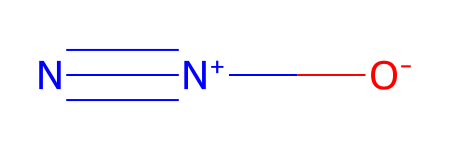

,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,1.3063,0.0,0.0
1,1,N,7,-0.1096,0.0,0.0
2,2,N,7,-1.1967,0.0,0.0


*** Running default Gamess job.
*** Updating coords (Pandas version).
*** Set frame rotations, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,-1.3063
1,1,N,7,0.0,0.0,0.1096
2,2,N,7,0.0,0.0,1.1967


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x rkvsot -ddi 1 1 jake -scr /tmp/tmpl5uh5c15 > /tmp/tmpl5uh5c15/rkvsot.out
Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x rkvsot -ddi 1 1 jake -scr /tmp/tmpl5uh5c15 > /tmp/tmpl5uh5c15/rkvsot.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x rkvsot -ddi 1 1 jake -scr /tmp/tmpl5uh5c15 > /tmp/tmpl5uh5c15/rkvsot.out


*** Init pyGamess job.
Default Gamess input card set (use self.params to modify options dictionary, self.setGamess() to test):

 $contrl scftyp=rhf runtyp=energy $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $DATA
None
C1
O      8.0      0.0000000000    0.0000000000   -1.3063000000 
N      7.0      0.0000000000    0.0000000000    0.1096000000 
N      7.0      0.0000000000    0.0000000000    1.1967000000 
 $END

*** Found Gamess executable: /opt/gamess/gamess.00.x
*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = -181.1830797993
*** Gamess output file moved to /tmp/autobuild.out


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,-1.3063
1,1,N,7,0.0,0.0,0.1096
2,2,N,7,0.0,0.0,1.1967


In [43]:
# Set via build=True
# This runs the process from scratch
testBuild = ESgamess(searchName = 'N2O', fileOut = '/tmp/autobuild.out', buildES = True)

In [44]:
# Running the function for an existing class object also works
# Note this will use the existing geometry and configuration 
# (although some items MAY BE reset by initGamess() routine - TBD)
testDL.buildES(fileOut = '/tmp/autobuild.out')

*** Running default Gamess job.
*** Updating coords (Pandas version).
*** Set frame rotations, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,-1.588291
1,1,N,7,0.0,0.0,-2.588291
2,2,N,7,0.0,0.0,4.176582


Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x myynof -ddi 1 1 jake -scr /tmp/tmpr3rmaldv > /tmp/tmpr3rmaldv/myynof.out
Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x myynof -ddi 1 1 jake -scr /tmp/tmpr3rmaldv > /tmp/tmpr3rmaldv/myynof.out
INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x myynof -ddi 1 1 jake -scr /tmp/tmpr3rmaldv > /tmp/tmpr3rmaldv/myynof.out


*** Init pyGamess job.
Default Gamess input card set (use self.params to modify options dictionary, self.setGamess() to test):

 $contrl scftyp=rhf runtyp=energy $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $DATA
N2O sym testing
CNV 8

O      8.0      0.0000000000    0.0000000000   -1.5882910000 
N      7.0      0.0000000000    0.0000000000   -2.5882910000 
N      7.0      0.0000000000    0.0000000000    4.1765820000 
 $END

*** Found Gamess executable: /opt/gamess/gamess.00.x
*** ddikick exit status OK:  ddikick.x: exited gracefully.
*** Gamess run completed OK.
E = 0
*** Gamess output file moved to /tmp/autobuild.out


,Ind,Species,Atomic Num.,x,y,z
0,0,O,8,0.0,0.0,-1.588291
1,1,N,7,0.0,0.0,-2.588291
2,2,N,7,0.0,0.0,4.176582


## Versions

In [45]:
import scooby
scooby.Report(additional=['epsman', 'cclib', 'rdkit'])

--------------------------------------------------------------------------------
  Date: Tue Jan 23 18:04:49 2024 EST

                OS : Linux
            CPU(s) : 64
           Machine : x86_64
      Architecture : 64bit
       Environment : Jupyter

  Python 3.7.10 (default, Feb 26 2021, 18:47:35)  [GCC 7.3.0]

            epsman : 0.0.1
             cclib : 1.7
             rdkit : 2023.03.2
             numpy : 1.19.2
             scipy : 1.6.1
           IPython : 7.21.0
        matplotlib : 3.3.4
            scooby : 0.5.6

  Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------

In [46]:
# Check current Git commit for local ePSproc version
from pathlib import Path
import epsman as em

!git -C {Path(em.__file__).parent} branch
!git -C {Path(em.__file__).parent} log --format="%H" -n 1

  master
* restructure160221
915b86e7fcfcbf57180180973d911f8d2e0b88b6


In [47]:
# Check current remote commits
!git ls-remote --heads https://github.com/phockett/epsman

21b4357a169baf9fa7887c68bd1cf8f92c59642c	refs/heads/master
915b86e7fcfcbf57180180973d911f8d2e0b88b6	refs/heads/restructure160221
